In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('/home/aliciescont/Documents/Github/Omdena/omdena-iraq-gun-violence/src/tasks/task-6-data-visualization-documentation/data/attacks.csv', parse_dates=True)
df.head()

,Date,Location,Article,Description,dead,injured
0,2021-07-19,Baghdad,2021 Iraq Market Bombing,"In the evening of Monday, 19 July, 2021, an IS...",30.0,50.0
1,2021-01-21,Baghdad,Baghdad bombings,Islamic State of Iraq and the Levant targeted ...,32.0,110.0
2,2019-08-24,KIRKUK,-,In the night of 24 August 2019 six Iraqi peopl...,6.0,10.0
3,2018-04-12,Al-Shirqat,2018 Asdira funeral bombing,25 people were killed and 18 wounded when expl...,25.0,18.0
4,2018-01-15,Baghdad,"January 15, 2018 Baghdad bombings","On 15 January 2018, two suicide bombings took ...",38.0,105.0


In [3]:
df.dropna(inplace=True)
df.isnull().sum()

Date           0
Location       0
Article        0
Description    0
dead           0
injured        0
dtype: int64

In [4]:
import plotly.express as px
df = df.sort_values(by="Date", ascending="True")
df['total_casualties'] = df['dead']+df['injured']
fig = px.bar(df, x="Location", y="total_casualties", title="Total casualties by violent event")
fig.show()


In [5]:
fig = px.line(df, x="Date", y=df.columns[4:6], title="Casualties in Iraq due to violence acts")
fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_layout(hovermode="x")
fig.show()

# Time Series analysis - WIP

In [6]:

df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))
#df.dtypes

/home/aliciescont/anaconda3/envs/social-scrap/lib/python3.8/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_29501/2226428323.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



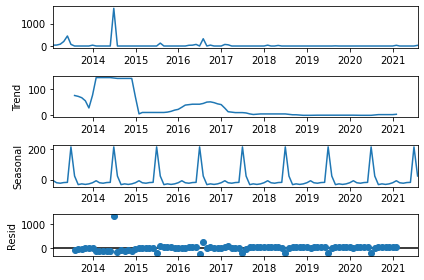

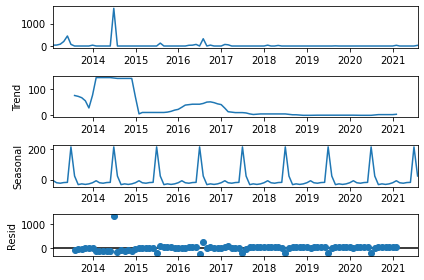

In [7]:
import statsmodels.api as sm

#set index to date
df_ts_dead = df[['Date', 'dead']]
df_ts_dead.dropna(inplace=True)
df_ts_dead['Date'] = pd.to_datetime(df['Date'])
df_ts_dead = df_ts_dead.set_index('Date').resample('M').mean()
df_ts_dead = df_ts_dead.fillna(0)

decomposition = sm.tsa.seasonal_decompose(df_ts_dead, model='additive')

decomposition.plot()


The previous plots are done resample data monthly, but not sure about of this, needs to do more tests